# __Commonly used map plots__ 
### (Plots contain graphic experiments in order to show posibilities)

## __Import libraries__

In [1]:
from pathlib import Path

current_path = Path().resolve()

for parent in current_path.parents:
    if parent.name == "accesibilidad-urbana":
        project_root = parent
        break

print(project_root)

/home/jovyan/accesibilidad-urbana


In [2]:
import os
import sys

import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

from pandas.api.types import CategoricalDtype

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join(project_root))
if module_path not in sys.path:
    print(f"Path found.")
    sys.path.append(module_path)
    import aup
else:
    print(f"Path NOT found.")
    import aup

Path found.


## __Notebook config__

In [ ]:
res = 8
city = 'Aguascalientes'

## __Load and plot municipalities, areas of interest, edges__ + Grid, ticks, axis configurations.

In [5]:
# Download area of interest (aoi)
print('--- Downloading area of interest.')
metro_schema = 'metropolis'
metro_table = 'metro_gdf_2020'
query = f"SELECT * FROM {metro_schema}.{metro_table} WHERE \"city\" LIKE \'{city}\'"
mun_gdf = aup.gdf_from_query(query, geometry_col='geometry')

# Create area of interest from dissolved municipalities
mun_gdf.to_crs("EPSG:6372",inplace=True)
aoi = mun_gdf.buffer(5)
aoi_gdf = gpd.GeoDataFrame(geometry=aoi,crs="EPSG:6372").dissolve()
aoi_gdf.to_crs("EPSG:4326",inplace=True)

# Download Network (G, nodes, edges)
print('--- Downloading network.')
network_schema = 'osmnx'
nodes_table = 'nodes_osmnx_23_point'
edges_table = 'edges_speed_23_line'
G, nodes_gdf, edges_gdf = aup.graph_from_hippo(aoi, schema=network_schema, edges_folder=edges_table, nodes_folder=nodes_table)

# Show
print(edges_gdf.crs)
print(edges_gdf.shape)
edges_gdf.head(2)

--- Downloading area of interest.
--- Downloading network.
EPSG:4326
(128049, 19)


osmid  oneway                   name   
u          v          key                                             
8414611560 1729024510 0    906116849   False  Boulevard Guadalupano  \
           2304455693 0    906116850    True  Boulevard Guadalupano   

                             highway  length   
u          v          key                      
8414611560 1729024510 0    secondary  53.013  \
           2304455693 0    secondary  11.792   

                                                                    geometry   
u          v          key                                                      
8414611560 1729024510 0    LINESTRING (-102.25354 21.91028, -102.25343 21...  \
           2304455693 0    LINESTRING (-102.25354 21.91028, -102.25353 21...   

                           grade  grade_abs lanes bridge maxspeed     ref   
u          v          key                                                   
8414611560 1729024510 0   -0.038      0.038     3   None     None  AGS 60  \
           2304455693 0    0.000      0.000     3   None       40  AGS 60   

                          access junction service tunnel width  walkspeed   
u          v          key                                                   
8414611560 1729024510 0     None     None    None   None  None    3.50186  \
           2304455693 0     None     None    None   None  None    4.00000   

                           time_min  
u          v          key            
8414611560 1729024510 0    0.908311  
           2304455693 0    0.176880

[Text(-102.7, 0, '-102.7'),
 Text(-102.60000000000001, 0, '-102.6'),
 Text(-102.4, 0, '-102.4'),
 Text(-102.3, 0, '-102.3'),
 Text(-102.2, 0, '-102.2'),
 Text(-102.10000000000001, 0, '-102.1')]

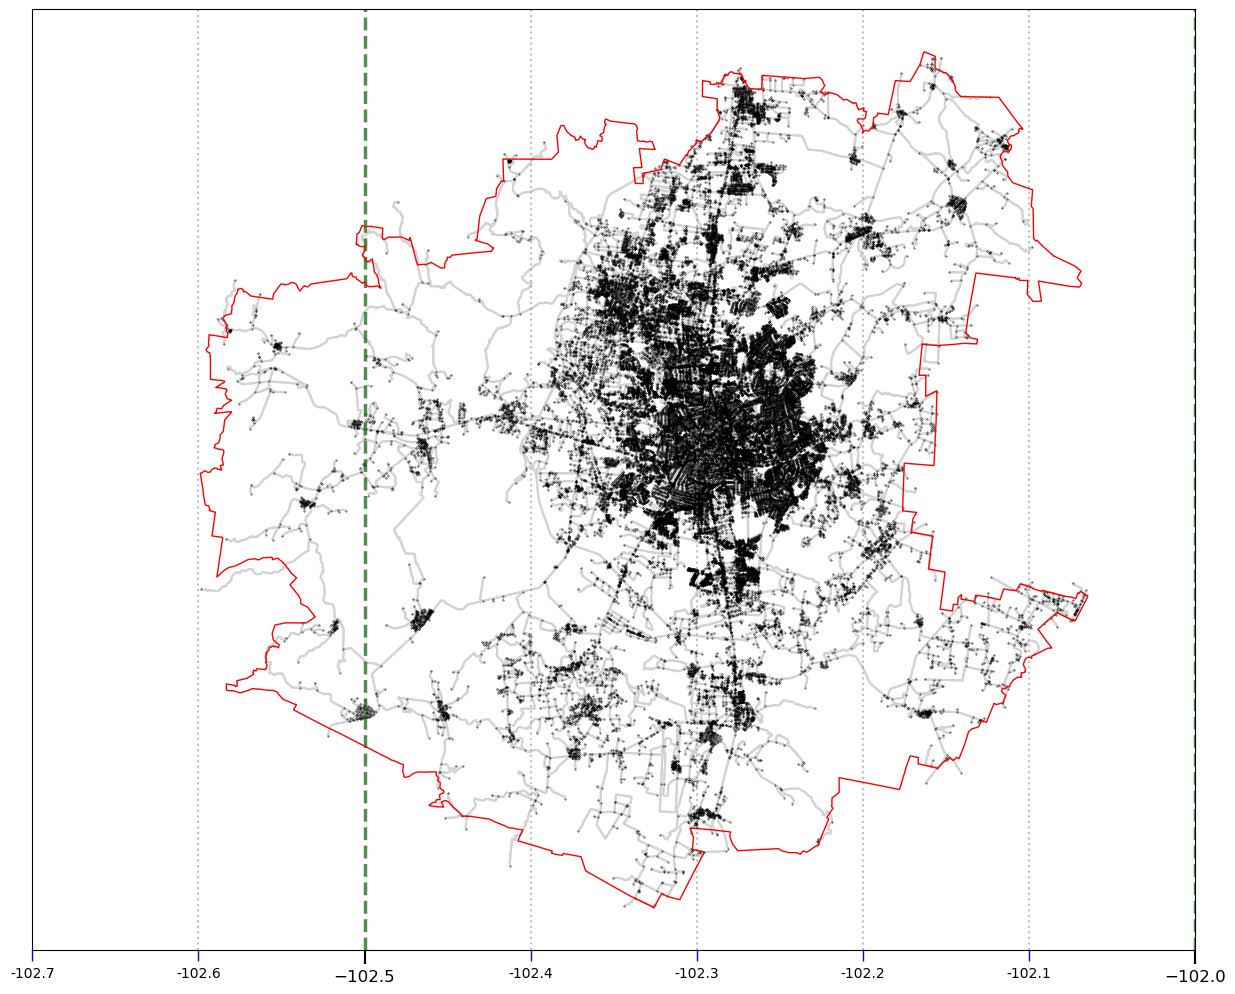

In [91]:
fig,ax = plt.subplots(figsize=(15,15))

aoi_gdf.plot(ax=ax,zorder=2,facecolor='none',lw=1,edgecolor='red')
nodes_gdf.plot(ax=ax,zorder=1,markersize=0.1,color='black')
edges_gdf.plot(ax=ax,zorder=0,color='lightgrey')

# About axis objects: https://matplotlib.org/stable/api/axis_api.html
# Turn off y axis
ax.yaxis.set_visible(False)

# Set x axis to every 0.1 coords (minor) and 0.5 coords (major)
# ----- SET MINOR AND MAJOR VALUES FOR X AXIS
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5)) #ax.grid obeys major ticks
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

# ----- CONFIGURE TICKS
# Configure major x tick
ax.tick_params(axis='x', which='major',
               length=10,      # Largo del tick
               width=1.5,     # Grosor
               color='black',
               labelsize=12,  # Tamaño del texto
               direction='out')
# Configure minor x tick
ax.tick_params(axis='x', which='minor',
               length=8,
               width=1,
               color='blue',
               labelsize=10,
               direction='out')

# ----- CONFIGURE GRID
ax.grid(color='blue', linestyle='--', linewidth=0.5)
ax.grid(True, which='major', axis='x', linestyle='--', linewidth=2.5, alpha=0.7, color='darkgreen') #Overrides ax.grid
ax.grid(True, which='minor', axis='x', linestyle=':', linewidth=1.5, alpha=0.5, color='grey')

# ----- TURN ON MINOR TICK LABELS
# Activar etiquetas para ticks menores manualmente
minor_locs = ax.xaxis.get_minor_locator()()
ax.set_xticks(minor_locs, minor=True)
ax.set_xticklabels([f"{x:.1f}" for x in minor_locs], minor=True, fontsize=10)

## __Load and plot proximity analysis data__ + Title, text, legend title configurations.

In [11]:
# Load proximity data
prox_schema = 'prox_analysis'
prox_table = f'proximityanalysis_v2_23_mzaageb_hex'
# Load city's hexs filtering for urban areas if required
query = f"SELECT * FROM {data_schema}.{data_table} WHERE \"city\" = '{city}\' AND \"res\" = '{res}\'"
prox_gdf = aup.gdf_from_query(query, geometry_col='geometry')

# Show
print(prox_gdf.crs)
print(prox_gdf.shape)
prox_gdf.head(2)

epsg:4326
(326, 69)


,hex_id,res,geometry,max_escuelas,max_preescolar,max_primaria,max_secundaria,max_servicios comunitarios,max_salud,max_guarderías,...,pobmas,p_0a5,p_6a11,p_12a17,p_18a24,p_25a59,p_60ymas,pcon_disc,dens_pob_ha,city
0,88498e3663fffff,8,"POLYGON ((-102.25507 21.87373, -102.25048 21.8...",19.555528,9.509851,10.855071,19.555528,15.093313,9.821487,10.963312,...,1848.5159,335.58023,333.89948,316.66147,421.74573,1794.56247,702.35020,329.46800,45.210681,Aguascalientes
1,88498e3455fffff,8,"POLYGON ((-102.25547 21.92880, -102.25087 21.9...",11.626070,10.694301,6.959306,11.626070,44.004748,9.532449,9.070579,...,6153.3457,1475.07596,1778.80790,1803.25476,1425.95680,5503.76543,471.98077,702.15735,144.291588,Aguascalientes


In [13]:
# Categorize time data in time bins
column = 'mean_time'
prox_gdf.loc[prox_gdf[column]>=60 , f'{column}_cat'] = '60 or more minutes'
prox_gdf.loc[(prox_gdf[column]>=45 )&
             (prox_gdf[column]<60), f'{column}_cat'] = '45 minutes to 60 minutes'
prox_gdf.loc[(prox_gdf[column]>=30)&
             (prox_gdf[column]<45), f'{column}_cat'] = '30 minutes to 45 minutes'
prox_gdf.loc[(prox_gdf[column]>=15)&
             (prox_gdf[column]<30), f'{column}_cat'] = '15 minutes to 30 minutes'
prox_gdf.loc[(prox_gdf[column]<15), f'{column}_cat'] = '15 minutes or less'

# Order data
categories = ['15 minutes or less','15 minutes to 30 minutes','30 minutes to 45 minutes','45 minutes to 60 minutes','60 or more minutes']
prox_gdf[f'{column}_cat'] = pd.Categorical(prox_gdf[f'{column}_cat'], categories=categories, ordered=True)

# Show
print(prox_gdf.crs)
print(prox_gdf.shape)
prox_gdf.head(2)

epsg:4326
(326, 70)


,hex_id,res,geometry,max_escuelas,max_preescolar,max_primaria,max_secundaria,max_servicios comunitarios,max_salud,max_guarderías,...,p_0a5,p_6a11,p_12a17,p_18a24,p_25a59,p_60ymas,pcon_disc,dens_pob_ha,city,mean_time_cat
0,88498e3663fffff,8,"POLYGON ((-102.25507 21.87373, -102.25048 21.8...",19.555528,9.509851,10.855071,19.555528,15.093313,9.821487,10.963312,...,335.58023,333.89948,316.66147,421.74573,1794.56247,702.35020,329.46800,45.210681,Aguascalientes,15 minutes or less
1,88498e3455fffff,8,"POLYGON ((-102.25547 21.92880, -102.25087 21.9...",11.626070,10.694301,6.959306,11.626070,44.004748,9.532449,9.070579,...,1475.07596,1778.80790,1803.25476,1425.95680,5503.76543,471.98077,702.15735,144.291588,Aguascalientes,15 minutes or less


Text(0.03, 0.98, 'Set random text.')

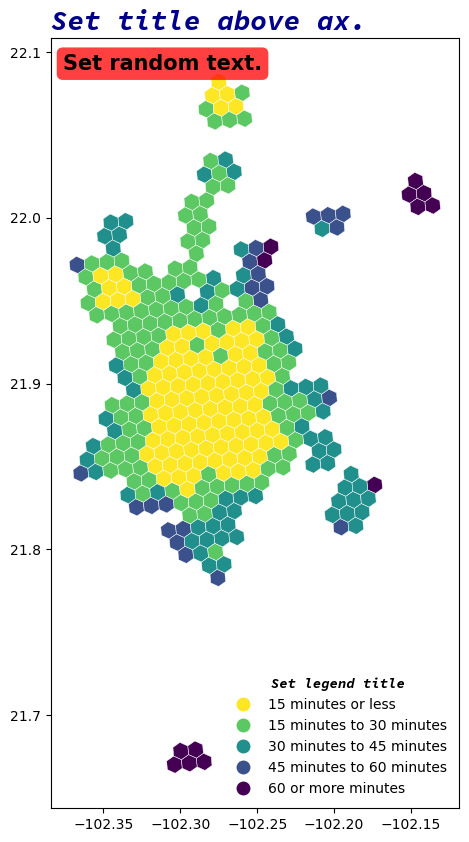

In [68]:
fig,ax = plt.subplots(figsize=(10,10))

# ----- PLOT AND SET LEGEND TITLE
prox_gdf.plot(ax=ax,
              column=f'{column}_cat',
              cmap='viridis_r',
legend=True,
#Legend kwards allows for changes. More in https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend
legend_kwds={'loc':'lower right',
            'frameon':False,
            'title':"Set legend title",
            "title_fontproperties":{'family':'Source Code Pro', #Font properties in https://matplotlib.org/stable/api/font_manager_api.html#matplotlib.font_manager.FontProperties
                                    'style':'italic',
                                    'weight':'bold'}
            }, 
linestyle='-',
linewidth=0.35,
edgecolor='white',
zorder=1
)

# ----- SET TITLE ABOVE AX
ax.set_title("Set title above ax.",
             fontsize=20,
             fontweight='bold',
             family='Source Code Pro',
             style='italic',
             color='darkblue',
             loc='left'
            )

# ----- SET RANDOM TEXT
ax.text(0.03, 0.98, 'Set random text.',
        fontsize=15, 
        fontweight='bold',
        ha='left', va='top', # Text allignment
        transform=ax.transAxes, #ax.tramsAxes sets position relative to axes instead of coordinates
        bbox=dict(facecolor='red', edgecolor='none', # Create semi-transparent box around text [Canceled]
                  alpha=0.75, boxstyle='round,pad=0.3'
                 ) 
           )

## __Load and plot NDVI data__